$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\mymatrix}[2]{\left[ \begin{array}{#1} #2\end{array} \right]} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $

<table style="background-color: transparent;">
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%" align="center"><font size="7" color="#f25625">Computación Cuántica</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">Temas Selectos de Ingeniería en Computación I</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">2024-2</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="6" color="#f25625">Laboratorio 8: Quantum Annealing</font></td>
    </tr>
</table>

## Contenido

1. [Introducción](#1)
   1. [Quantum Annealing](#1.1)
   2. [Computadoras D-Wave](#1.2)
   3. [Proceso de Quantum Annealing](#1.3)
2. [Ocean SDK](#2)
   1. [Instalación](#2.1)
3. [Problemas de optimización combinatoria](#3)
   1. [Travelling Salesman Problem (TSP)](#3.1)
   2. [Paquete `networkx` y visualización de grafos](#3.2)
   3. [Graph Coloring Problem](#3.3)
   4. [Max-cut](#3.4)
4. [Quadratic Unconstrained Binary Optimization (QUBO)](#4)
   1. [Forma matricial](#4.1)
   2. [Formulación QUBO para Max-Cut](#4.2)
5. [El modelo Ising](#5)
   1. [Energía del sistema](#5.1)
   2. [Formulación del modelo Ising para Max-Cut](#5.2)
   3. [Conversión de Ising a QUBO](#5.3)
6. [Binary Quadratic Model](#6)
   1. [Clase `BinaryQuadraticModel` (BQM) de Ocean SDK](#6.1)
   2. [Encontrar la energía más baja usando un muestreador clásico](#6.2)
   3. [Annealing simulado](#6.3)
   4. [Quantum Annealing en D-Wave](#6.4)

<a id="1"></a>
# 1. Introducción

<a id="1.1"></a>
## 1.A Quantum Annealing

**Quantum Annealing** es una técnica de optimización que aprovecha principios de la mecánica cuántica para encontrar soluciones óptimas o casi óptimas a problemas complejos de minimización. A diferencia de los métodos clásicos de optimización, como el recocido simulado o temple simulado (Simulated Annealing), el Quantum Annealing utiliza efectos cuánticos, como el _túnel cuántico_ y la _superposición_, para explorar el espacio de soluciones de manera más eficiente, con el objetivo de encontrar el mínimo (o máximo) global de una función objetivo determinada. El _recocido cuántico_ tiene aplicaciones en diversos campos, incluidos la logística, las finanzas y el aprendizaje automático.

El recocido cuántico comienza representando el problema de optimización como un paisaje energético (energy landscape), donde la solución corresponde al estado energético más bajo. El sistema cuántico se prepara inicialmente en una superposición de todas las soluciones posibles, lo que representa un estado de energía baja en un Hamiltoniano inicial fácilmente preparado. Poco a poco, el sistema evoluciona ajustando el Hamiltoniano, permitiendo que explore el paisaje energético mediante efectos cuánticos como el túnel cuántico. El objetivo es guiar el sistema al estado de menor energía en el Hamiltoniano final, correspondiente a la solución óptima o casi óptima del problema.

**Nota**: Un Hamiltoniano es una función que describe la energía de un sistema cuántico en términos de sus estados posibles.

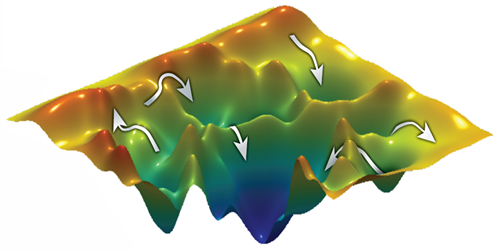

<p style="font-size:10px;font-style:italic;text-align:right"><a href="https://physics.aps.org/articles/v10/s100" target="_blank">Imagen obtenida de Physics APS</a></p>

A diferencia de las computadoras cuánticas basadas en compuertas, que realizan cálculos utilizando una secuencia de compuertas cuánticas, los _quantum annealers_ operan a través de una evolución continua regida por la **ecuación de Schrödinger**. Este enfoque continuo puede ser más natural para ciertos problemas, pero puede carecer de la universalidad de la computación cuántica basada en compuertas. Los recocidos cuánticos son dispositivos especializados, a menudo diseñados para tipos específicos de problemas de optimización.

$$i\hbar \frac{\partial}{\partial t} |\psi(t)\rangle = \hat{H}(t) |\psi(t)\rangle$$

<a id="1.2"></a>
## 1.B Computadoras D-Wave

Los recocidos cuánticos se han utilizado para abordar problemas complejos de optimización en áreas como la optimización del tráfico, la gestión de carteras y el descubrimiento de fármacos. Empresas como **D-Wave** han desarrollado quantum annealers comerciales, haciendo que esta tecnología sea accesible para la industria y la investigación. Sin embargo, persisten desafíos, incluida la sensibilidad al ruido, el control de errores y la necesidad de codificación para problemas específicos. La investigación sobre algoritmos híbridos cuánticos-clásicos y técnicas de mitigación de errores continúa mejorando las capacidades de los recocedores cuánticos.

Quantum Annealing representa un enfoque único para la computación cuántica, centrándose en resolver problemas de optimización del mundo real. Es un área de investigación y desarrollo activo, con esfuerzos continuos para comprender mejor su potencial y sus limitaciones.

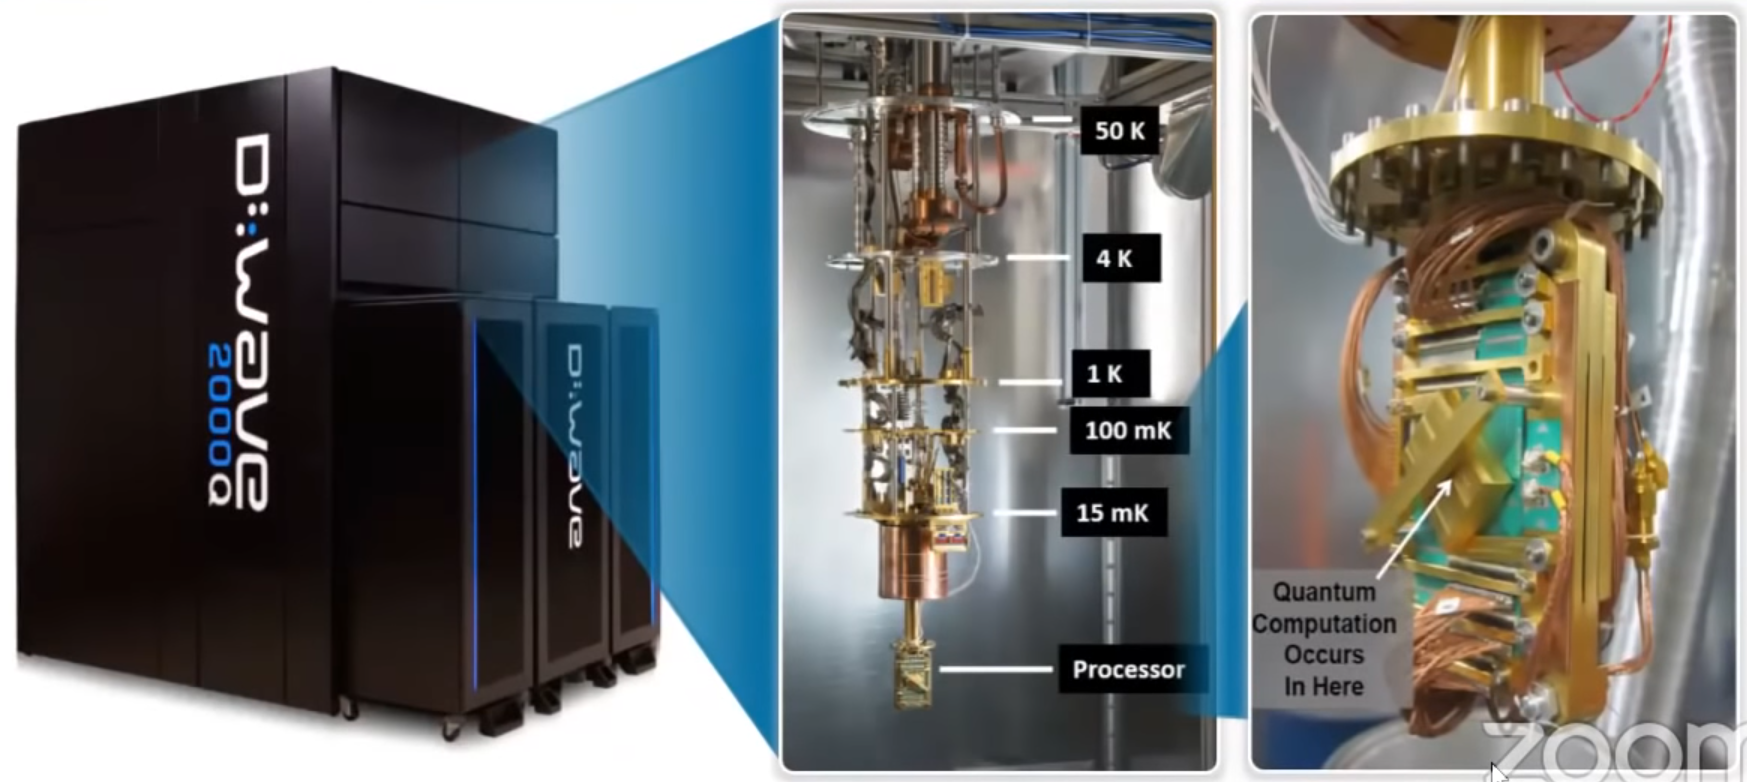

<p style="font-size:10px;font-style:italic;text-align:right"><a href="https://www.youtube.com/watch?v=Djzct7HQDOE&t=3421s&ab_channel=D-Wave" target="_blank">Imagen obtenida de la presentación "Leap: The Quantum Application Environment"</a></p>

Los qubits en una computadora D-Wave son **circuitos superconductores** que operan a temperaturas extremadamente bajas, cercanas al cero absoluto (aproximadamente 15 milikelvin), para reducir el ruido térmico y permitir efectos cuánticos.

Los **qubits están conectados mediante enlaces (o acopladores)** que permiten interacciones entre ellos. La configuración de estos enlaces forma un _grafo que representa el problema de optimización_. La arquitectura de conexión más reciente de D-Wave se llama "Pegasus" [[D-Wave QPU Architecture: Topologies](https://docs.dwavesys.com/docs/latest/c_gs_4.html)].

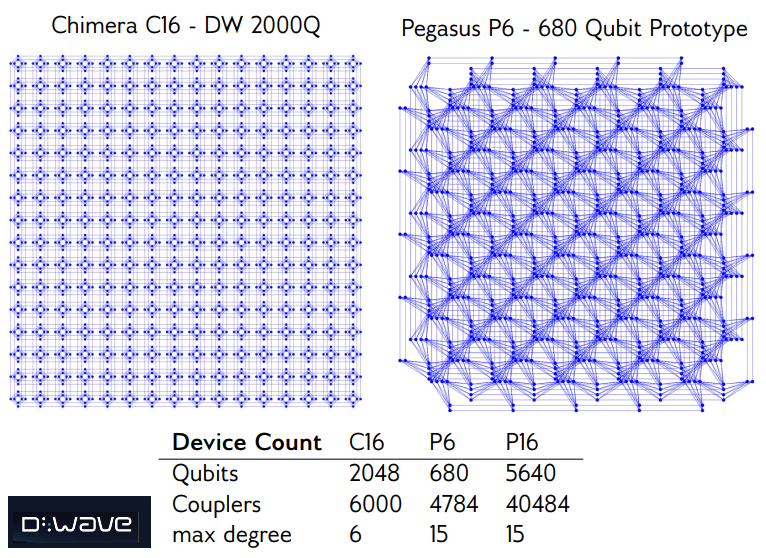

<a id="1.3"></a>
## 1.C Proceso de Quantum Annealing

El proceso de Quantum Annealing se basa en dos Hamiltonianos:

- **Hamiltoniano Inicial ($\hat{H}_B$)**: Representa un estado donde todos los qubits están en una superposición de 0 y 1. Es fácil de preparar y corresponde a un sistema con energías bajas y bien definidas. (El subíndice $B$ es por _Beginning_).
- **Hamiltoniano Final ($\hat{H}_P$)**: Representa el problema de optimización. Este Hamiltoniano está diseñado de tal forma que su estado de energía mínima corresponde a la solución óptima del problema. (El subíndice $P$ es por _Problem_).

El sistema evoluciona desde el Hamiltoniano inicial al Hamiltoniano final mediante un parámetro de tiempo $s(t)$, que varía de 0 a 1. El Hamiltoniano efectivo en un momento dado es una combinación lineal de ambos:

$$ \hat{H}(s) = \big(1-s(t)\big)\hat{H}_B + s(t)\hat{H}_P $$

A lo largo del proceso de annealing, el sistema usa el **túnel cuántico** para superar barreras de energía que los métodos clásicos no pueden atravesar. El objetivo es que el sistema permanezca en su estado fundamental (mínima energía) mientras el **Hamiltoniano evoluciona lentamente**, asegurando que al final del proceso, el sistema se encuentre en el estado correspondiente a la solución óptima.

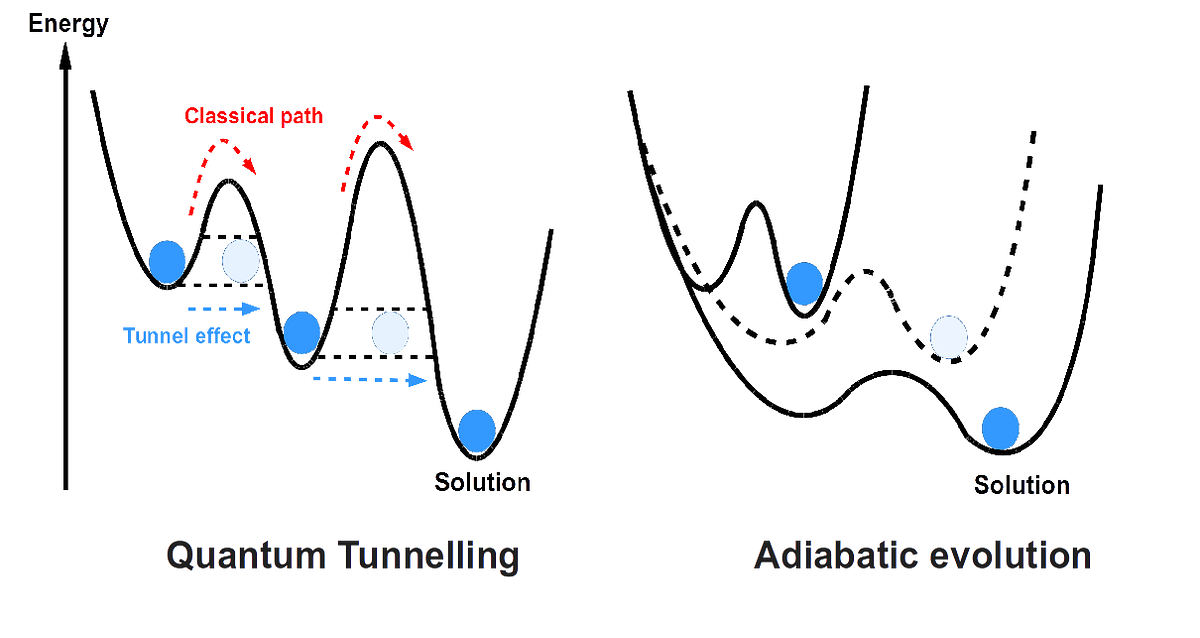

La evolución se diseña para ser lo suficientemente lenta para que el sistema permanezca en su estado de energía más baja (estado fundamental) según el teorema adiabático de la mecánica cuántica. Si la evolución es adiabática, el sistema seguirá el estado fundamental del Hamiltoniano $\hat{H}(t)$ en cada instante.

Al final del proceso de annealing, los estados de los qubits se miden. Las medidas proporcionan una solución al problema de optimización, representada por una configuración específica de $0$s y $1$s en los qubits.

Para usar la máquina D-Wave, los problemas de optimización deben ser formulados como problemas **QUBO (Quadratic Unconstrained Binary Optimization)** o **Ising**. Estos problemas se describen mediante matrices que representan las interacciones entre variables (qubits).

<a id="2"></a>
# 2. Ocean SDK

El Ocean SDK es un conjunto de herramientas de software desarrollado por D-Wave Systems para facilitar la programación y el uso de sus computadoras cuánticas de tipo Quantum Annealer. Este kit de desarrollo de software está diseñado para ayudar a los desarrolladores a formular, resolver y analizar problemas de optimización utilizando la tecnología de temple cuántico de D-Wave.

Permite transformar problemas de optimización del mundo real en formatos compatibles con las máquinas de D-Wave, principalmente QUBO y modelos de Ising.

<a id="2.1"></a>
## 2.A Instalación

    !pip install dwave-ocean-sdk

Más información en: https://docs.ocean.dwavesys.com/en/stable/overview/install.html#installoceansoftware

In [1]:
# Paquetes extra:

# !pip install matplotlib

### Revisar instalación

Si se puede ejecutar la siguiente celda sin recibir ningún error, entonces la instalación debería estar bien.

In [2]:
from dimod import BQM, ExactSolver
bqm = BQM({'x1': 0.0, 'x2': 0.0, 'y1': 6.0},
                   {('x2', 'x1'): 2.0, ('y1', 'x1'): -4.0, ('y1', 'x2'): -4.0},
                      0, 'BINARY')

sampler = ExactSolver()
response = sampler.sample(bqm)
print(response)

# debería imprimir: 
#    x1 x2 y1 energy num_oc.
# 0  0  0  0    0.0       1
# 1  1  0  0    0.0       1
# 3  0  1  0    0.0       1
# 5  1  1  1    0.0       1
# 2  1  1  0    2.0       1
# 4  0  1  1    2.0       1
# 6  1  0  1    2.0       1
# 7  0  0  1    6.0       1
# ['BINARY', 8 rows, 8 samples, 3 variables]

  x1 x2 y1 energy num_oc.
0  0  0  0    0.0       1
1  0  1  0    0.0       1
3  1  0  0    0.0       1
5  1  1  1    0.0       1
2  1  1  0    2.0       1
4  1  0  1    2.0       1
6  0  1  1    2.0       1
7  0  0  1    6.0       1
['BINARY', 8 rows, 8 samples, 3 variables]


### Configurar el acceso a los solucionadores D-Wave

Para ejecutar los problemas en las QPU de D-Wave, se debe realizar una configuración. Sin embargo, es posible no tener acceso según la región. Consulta este [sitio web](https://docs.ocean.dwavesys.com/en/stable/overview/sapi.html#sapi-access) para obtener más detalles e instrucciones de configuración.

<a id="3"></a>
# 3. Problemas de optimización combinatoria

La optimización combinatoria se ocupa de encontrar una solución óptima o cercana a la óptima entre una colección finita de posibilidades.

Estos problemas aparecen en el sistema de navegación de los automóviles, en la creación de horarios para las escuelas, en los sistemas de apoyo a la toma de decisiones en entornos de producción y logística, en la determinación de la forma óptima de entregar paquetes, etc. En muchos de estos problemas, hay que tener en cuenta que la búsqueda exhaustiva no es manejable en problemas del mundo real. Ahora veamos algunos ejemplos de problemas de optimización combinatoria.

<a id="3.1"></a>
## 3.A Travelling Salesman Problem (TSP)

Dado un conjunto de ciudades y la distancia entre cada par de ciudades, el problema es encontrar la ruta más corta posible de modo que un vendedor visite cada ciudad exactamente una vez y regrese al punto de partida.

El grafo que se muestra a continuación es no dirigido y el costo de moverse entre dos ciudades es el mismo para cada dirección. El grafo también podría ser dirigido, en cuyo caso se podrán asignar costos diferentes para cada dirección.

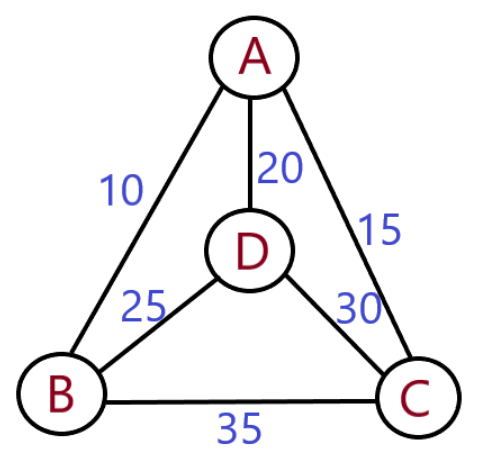

Un camino a través de un grafo que visita cada vértice (ciudad) exactamente una vez se llama <b>camino Hamiltoniano</b> o <b>ciclo Hamiltoniano</b> si es un camino cerrado.

Este problema es un problema NP-Hard. Esto significa que no se conoce ningún algoritmo eficiente (de tiempo polinómico) que encuentre la solución óptima.

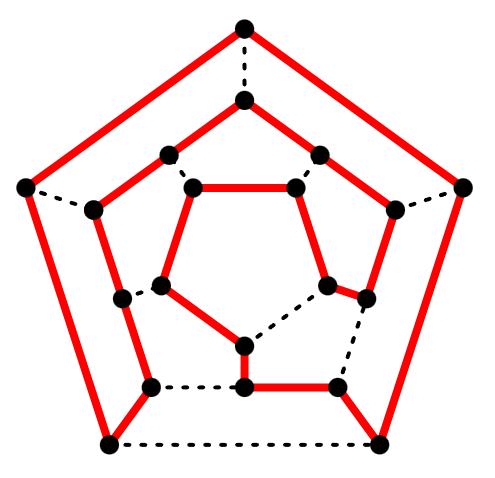

<a id="3.2"></a>
## 3.B Paquete `networkx` y visualización de grafos

Se puede utilizar el paquete `networkx` en Python para visualizar grafos. También tenemos algunas funciones integradas basadas en `networkx` para ayudarnos a visualizar las soluciones.

In [3]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import networkx as nx

##### Se define una serie de funciones que ayudan a la visualización de grafos:

In [4]:
def graph_viz(G):
    """Visualizar un grafo NetworkX

    Parámetros
    ----------
    G : networkx.Graph
        El grafo de NetworkX que se visualizará.

    nx.draw_kamada_kawai(
        G,
        with_labels=True,
        node_size=700,
        width=3,
        font_size=14,
        font_weight="bold",
        font_color="whitesmoke",
    )
    """
    options = {
        "node_size": 700,
        "width": 3,
        "arrowstyle": "-|>",
        "arrowsize": 12,
        "font_size": 14,
        "font_weight": "bold",
        "font_color": "whitesmoke",
    }
    pos = nx.kamada_kawai_layout(G)  # pos = nx.nx_agraph.graphviz_layout(G)
    nx.draw_networkx(G, pos, **options)
    labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.axis("off")
    plt.show()


def maxcut_viz(G, cut_nodes):
    """Visualizar el resultado del problema MaxCut.

    Parámetros
    ----------
    G : networkx.Graph
        Grafo NetworkX del problema.
    cut_nodes : dict

    """
    if isinstance(cut_nodes, dict):
        cut = set()
        for node, value in cut_nodes.items():
            if value == 1:
                cut.add(node)
    else:
        cut = cut_nodes

    S0 = [node for node in G.nodes if node in cut]
    S1 = [node for node in G.nodes if node not in cut]

    cut_edges = [
        (u, v)
        for u, v in G.edges
        if (u in S0 and v not in S0) or (u in S1 and v not in S1)
    ]
    uncut_edges = [
        (u, v) for u, v in G.edges if (u in S0 and v in S0) or (u in S1 and v in S1)
    ]

    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx_nodes(G, pos, nodelist=S0, node_color="tab:red", node_size=700)
    nx.draw_networkx_nodes(G, pos, nodelist=S1, node_color="tab:green", node_size=700)
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=cut_edges,
        style="dashed",
        edge_color="tab:blue",
        alpha=0.7,
        width=3,
    )
    nx.draw_networkx_edges(G, pos, edgelist=uncut_edges, style="solid", width=3)
    nx.draw_networkx_labels(
        G, pos, font_size=14, font_weight="bold", font_color="whitesmoke"
    )

    plt.tight_layout()
    plt.axis("off")
    plt.show()


def graph_coloring_viz(G, coloring):
    """Visualizar la salida del problema del graph coloring.

    Parámetros
    ----------
    G : networkx.Graph
        Grafo NetworkX del problema.

    coloring : dict
        Los colores asignado a los nodos.
    """

    color_list = {
        "B": "tab:blue",
        "O": "tab:orange",
        "G": "tab:green",
        "R": "tab:red",
        "P": "tab:pink",
        "Y": "tab:olive",
    }

    colors = list(mcolors.TABLEAU_COLORS)

    pos = nx.kamada_kawai_layout(G)

    for node, color in coloring.items():
        if isinstance(color, int):
            nx.draw_networkx_nodes(
                G, pos, nodelist=[node], node_color=[colors[color]], node_size=700
            )
        elif isinstance(color, str):
            nx.draw_networkx_nodes(
                G, pos, nodelist=[node], node_color=[color_list[color]], node_size=700
            )
        elif isinstance(color, list):
            nx.draw_networkx_nodes(
                G, pos, nodelist=[node], node_color="tab:black", node_size=700
            )

    nx.draw_networkx_edges(G, pos, edgelist=G.edges, style="solid", width=3)
    nx.draw_networkx_labels(
        G, pos, font_size=14, font_weight="bold", font_color="whitesmoke"
    )
    plt.tight_layout()
    plt.axis("off")
    plt.show()


def tsp_viz(G, input_path):
    """Visualizar la salida del travelling salesman problem.

    Parámetros
    ----------
    G : networkx.Graph
        Grafo NetworkX del problema.

    input_path : list/dict
        El orden en que se visitan las ciudades.
    """
    if isinstance(input_path, dict):
        input_path = [city for (pos, [city]) in sorted(input_path.items())]

    path = []
    for i in range(len(input_path)):
        if i + 1 == len(input_path):
            path.append((input_path[i], input_path[0]))
        else:
            path.append((input_path[i], input_path[i + 1]))

    non_path = [(u, v) for u, v in G.edges if (u, v) not in path and (v, u) not in path]

    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx_nodes(
        G, pos, nodelist=G.nodes, node_color="tab:blue", node_size=700
    )

    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=path,
        style="solid",
        width=3,
        arrows=True,
        arrowstyle="->",
        arrowsize=30,
    )
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=non_path,
        style="dashed",
        edge_color="tab:blue",
        alpha=0.7,
        width=3,
    )

    nx.draw_networkx_labels(
        G, pos, font_size=14, font_weight="bold", font_color="whitesmoke"
    )
    labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.tight_layout()
    plt.axis("off")
    plt.show()

##### Veamos un ejemplo:

D:\anaconda3\envs\ocean610\lib\site-packages\networkx\drawing\nx_pylab.py:305: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


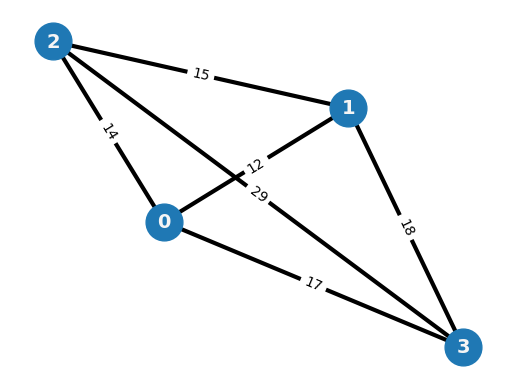

In [5]:
G = nx.Graph()
G.add_weighted_edges_from(
    [(0, 1, 12), (0, 2, 14), (0, 3, 17), (1, 2, 15), (1, 3, 18), (2, 3, 29)]
)
graph_viz(G)

Dada una ruta en la forma `[0,2,1,3]`, también podemos visualizarla:

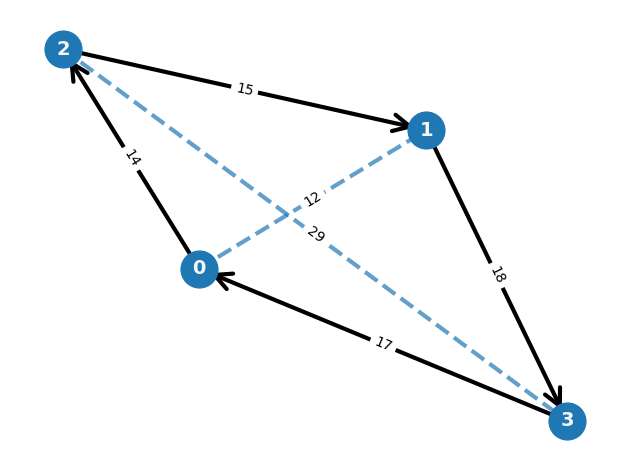

In [6]:
path = [0,2,1,3]
tsp_viz(G, path)

<a id="3.3"></a>
## 3.C Graph Coloring Problem

Graph Coloring es el procedimiento de asignación de colores a cada vértice de un grafo de modo que ningún vértice adyacente obtenga el mismo color. El objetivo es minimizar el número de colores. La cantidad más pequeña de colores necesarios para colorear un grafo se llama <b>número cromático</b>.

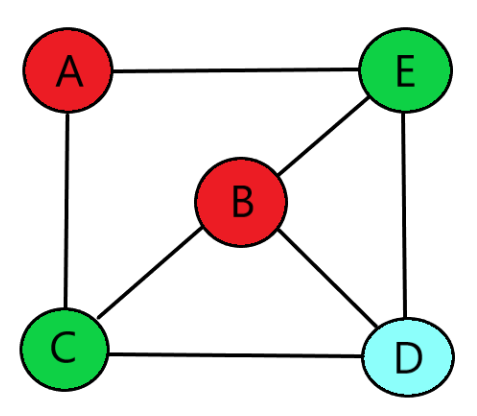

Este problema es NP-Hard para grafos generales. También hay una versión de decisión de este problema que plantea la pregunta "¿Se puede colorear este grafo usando $k$ colores?", que es NP-Completo para $k\geq 3$.

Podemos utilizar la herramienta de visualización que hemos creado definiendo los colores de los nodos como un diccionario y llamando a la función `graph_coloring_viz`.

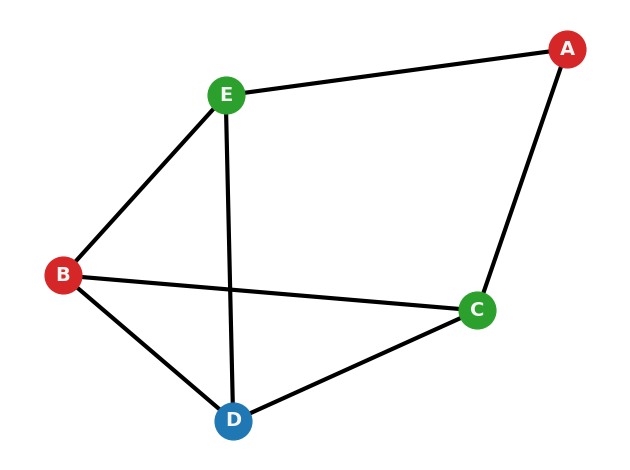

In [7]:
import bqm_utils
import networkx as nx

G = nx.Graph()
edges = [
    ("A", "C"),
    ("A", "E"),
    ("B", "C"),
    ("B", "E"),
    ("B", "D"),
    ("C", "D"),
    ("D", "E"),
]
G.add_edges_from(edges)

coloring = {"A": "R", "B": "R", "C": "G", "D": "B", "E": "G"}
bqm_utils.graph_coloring_viz(G, coloring)

<a id="3.4"></a>
## 3.D Max-cut

Dado un grafo, el objetivo es dividir los vértices en dos conjuntos disjuntos (lo que se denomina <b>corte</b>) de modo que el número de aristas entre los dos conjuntos sea máximo. El tamaño del corte se define como el número de aristas entre dos conjuntos.

En el grafo que figura a continuación, los vértices coloreados en blanco y negro forman los dos conjuntos.

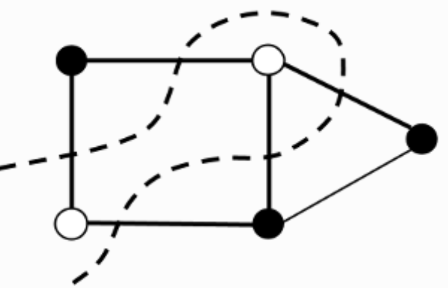

El problema Max-Cut es NP-Hard en general, pero para algunos casos especiales, se puede resolver de manera eficiente.

Consideremos nuevamente el siguiente grafo:

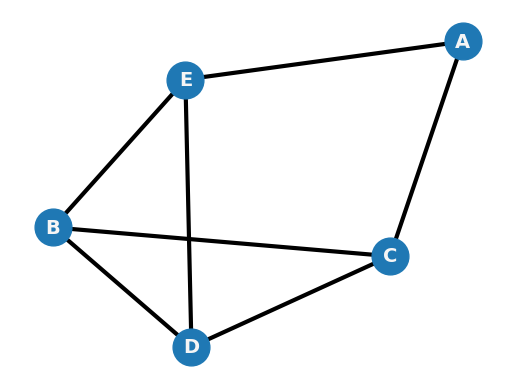

In [8]:
G = nx.Graph()
edges = [
    ("A", "C"),
    ("A", "E"),
    ("B", "C"),
    ("B", "E"),
    ("B", "D"),
    ("C", "D"),
    ("D", "E"),
]
G.add_edges_from(edges)
graph_viz(G)

Podemos visualizar un corte especificando los vértices en uno de los conjuntos. Digamos que tenemos los conjuntos $U=\{'A','B'\}$ y $\{'C','D,'E'\}$. Los bordes del corte se muestran con líneas discontinuas. Hay 5 bordes en el corte.

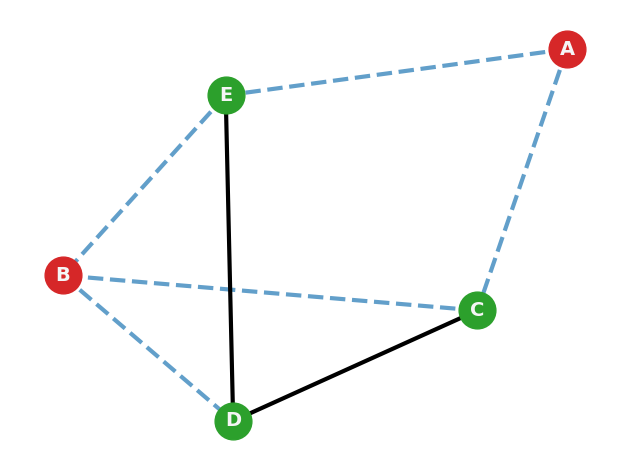

In [9]:
U = ['A', 'B']
maxcut_viz(G, U)

<a id="4"></a>
# 4. Quadratic Unconstrained Binary Optimization (QUBO)

Un problema de **optimización binaria cuadrática sin restricciones (QUBO)** se define utilizando una matriz $Q$ de $n \times n$ y un vector $x \in \{0,1\}^n$ donde,

- Se supone que $Q$ es simétrica o está en forma triangular superior. Para facilitar su uso, trabajaremos con $Q$ en su forma triangular superior.
- $x$ es un vector de variables binarias $0$ y $1$
  
Nuestro objetivo es minimizar la <b>función objetivo</b> definida como

$$f(x) = \sum\limits_i {Q_{i, i} x_i} + \sum\limits_{i < j} {Q_{i, j} x_i x_j}$$

donde,
- Los términos $Q_{i, i}$ son los coeficientes <b>lineales</b> de la función,
- Los términos $Q_{i, j}$ son los coeficientes <b>cuadráticos</b> de la función.

Una **función objetivo** da una **descripción matemática de un problema**. Deberíamos minimizar esta función objetivo para encontrar una solución óptima a nuestro problema. En la mayoría de los casos, cuanto menor sea el valor de la función objetivo, mejor será la solución obtenida. La función objetivo anterior se puede expresar de manera equivalente como

$$\min\limits_{x \in \{0, 1\}^n} {x^T Q x}$$

La formulación QUBO no se limita sólo a problemas de minimización, también se puede utilizar para problemas de maximización. Para encontrar una solución óptima a un problema de maximización, tenemos que minimizar el negativo de su función objetivo.

$$\max\limits_{x \in \{0, 1\}^n} {x^T Q x} = \min\limits_{x \in \{0, 1\}^n} -\ {x^ TQx}$$

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>:

Encontrar qué asignación de $x_1$ y $x_2$ minimiza la siguiente función objetivo

$$f(x_1, x_2) = 5x_1 + 7x_1 x_2 - 3x_2$$

**Nota**: Puedes ajustar los controles deslizantes para establecer diferentes valores para $x_1$ y $x_2$. Cuanto menor sea el valor de la función objetivo, mejor será la solución.

In [10]:
from ipywidgets import interact

def ejemplo_1(x1, x2):
    value = 5*x1 + 7*x1*x2 - 3*x2
    return f"El valor de la función objetivo es {value}"


interact(ejemplo_1, x1=(0, 1), x2=(0, 1));

interactive(children=(IntSlider(value=0, description='x1', max=1), IntSlider(value=0, description='x2', max=1)…

<div class="alert alert-block alert-info">
Cuando asignamos $x_1 = 0$ y $x_2 = 1$, el valor de la función objetivo dada resulta ser $-3$. Este es el valor más bajo posible de las cuatro permutaciones.

También podemos calcular analíticamente el valor de la función objetivo.

- $x_1 = 0$ y $x_2 = 0$

     $f(0, 0) = 5(0) + 7(0)(0) - 3(0) = 0$
  

- $x_1 = 0$ y $x_2 = 1$

     $f(0, 1) = 5(0) + 7(0)(1) - 3(1) = -3$


- $x_1 = 1$ y $x_2 = 0$
    
     $f(1, 0) = 5(1) + 7(1)(0) - 3(0) = 5$


- $x_1 = 1$ y $x_2 = 1$

     $f(1, 1) = 5(1) + 7(1)(1) - 3(1) = 9$
    
Por lo tanto, asignar $x_1 = 0$ y $x_2 = 1$ minimiza la función objetivo dada.

$$ $$
Podemos observar que ajustar los controles deslizantes a $1$ o $0$ es análogo a tomar una decisión de sí o no. Generalmente un problema consiste en muchas de estas decisiones de sí o no. Tomemos, por ejemplo, el problema TSP. ¿Debería el vendedor visitar la ciudad $A$ antes que la ciudad $B$? ¿O sería eficiente visitar primero la ciudad $C$? 

Notemos que cuanto mayor es el número de variables (decisiones), más tedioso es el proceso de resolución de problemas. En el ejercicio solo hay 2 variables y, por lo tanto, 4 permutaciones. Pero si tuvieramos 4 variables, entonces el resultado serían 16 permutaciones. El número de variables es directamente proporcional al número de permutaciones. ¡Piensa en una función objetivo con 100 variables! ¡Imagínate cómo sería encontrar el valor mínimo de esa función objetivo ajustando los controles deslizantes! 

Podemos superar parcialmente este problema utilizando la forma matricial de QUBO. Podemos trasladar la tarea de encontrar los valores correctos para las variables a una computadora. Sólo tenemos que calcular una matriz $Q$ que contenga toda la información sobre el problema en cuestión.

<a id="4.1"></a>
## 4.A Forma matricial

Tenemos que modelar la función objetivo en la siguiente forma matricial

$$\min\limits_{x \in \{0, 1\}^n} {x^T Q x}$$

Como se mencionó anteriormente, para facilitar su uso, trabajaremos con la matriz $Q$ en su forma triangular superior. El tamaño de la matriz depende del número de variables. Si hay $n$ variables, tenemos que definir una matriz de $n \times n$. Supongamos que hay 4 variables, entonces 

$$
Q = \begin{pmatrix}
        Q_{11} & Q_{12} & Q_{13} & Q_{14} \\ 
        0      & Q_{22} & Q_{23} & Q_{24} \\ 
        0      & 0      & Q_{33} & Q_{34} \\ 
        0      & 0      & 0      & Q_{44} \\ 
    \end{pmatrix}
$$

Ahora, ¿cómo poblamos esta matriz? 

- Los coeficientes lineales de la función objetivo deben rellenarse a lo largo de la diagonal principal.
- Los coeficientes cuadráticos deben completarse hasta las entradas fuera de la diagonal.

En términos generales, el coeficiente del término $x_i x_j$ de una función objetivo debe completarse en la entrada $Q_{ij}$ de la matriz $Q$. Las entradas restantes deben completarse con $0$.

El razonamiento detrás se puede ver realizando el producto $x^T Q x$ ya que se puede observar que

- El coeficiente de $x_1^2$ corresponde a la entrada $Q_{11}$.
- El coeficiente de $x_1 x_2$ corresponde a la entrada $Q_{12}$.

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>:

Consideremos la función objetivo

$$f(x_1, x_2, x_3, x_4) = - 5x_1 - 3x_2 - 8x_3 - 6x_4 + 4x_1 x_2 + 8x_1 x_3 + 2x_2 x_3 + 10x_3 x_4$$

Tenemos que,

- La parte lineal es $- 5x_1 - 3x_2 - 8x_3 - 6x_4$
- La parte cuadrática es $4x_1 x_2 + 8x_1 x_3 + 2x_2 x_3 + 10x_3 x_4$
  
Las variables binarias satisfacen $x_i = {x_i}^2$. Por lo tanto, la parte lineal se puede reescribir como, 

$$ - 5{x_1}^2 - 3{x_2}^2 - 8{x_3}^2 - 6{x_4}^2$$

Ahora podemos comenzar a poblar la matriz.

- Los términos lineales se rellenan a lo largo de la diagonal. Usando la forma cuadrática reescrita, el coeficiente de $x_1^2$ se completa en la entrada $Q_{11}$, el coeficiente de $x_2^2$ se completa en la entrada $Q_{22}$ y así sucesivamente.
- Los términos cuadráticos se completan en las posiciones fuera de la diagonal. El coeficiente de $x_1 x_2$ se completa en la posición $Q_{12}$, el coeficiente de $x_1 x_3$ se completa en la posición $Q_{13}$ y así sucesivamente.

$$
Q = \begin{pmatrix}
        -5  &  4   &  8   &  0  \\ 
        0   &  -3  &  2   &  0  \\ 
        0   &  0   &  -8  &  10  \\ 
        0   &  0   &  0   &  -6  \\ 
    \end{pmatrix}
$$

Entonces, ahora tenemos que resolver, 

$$
\min\limits_{x \in \{0, 1\}^4}
\begin{pmatrix}
    x_1 & x_2 & x_3 & x_4
\end{pmatrix}    
\begin{pmatrix}
  -5  &  4   &  8   &  0  \\ 
   0   &  -3  &  2   &  0  \\ 
   0   &  0   &  -8  &  10  \\ 
   0   &  0   &  0   &  -6  \\ 
\end{pmatrix}     
\begin{pmatrix}
     x_1 \\
     x_2 \\
     x_3 \\
     x_4 \\
\end{pmatrix}
$$

Por ahora, podemos resolver este problema computacionalmente usando fuerza bruta. Aprenderemos mejores formas de resolver este problema más adelante.

La función `qubo_solver()` tiene un parámetro `Q_matrix`. Tenemos que pasar la matriz $Q$ que hemos calculado como argumento a esta función. Para hacer eso, podemos definir la matriz calculada $Q$ en términos de un arreglo NumPy.

In [11]:
import itertools
import numpy as np

def qubo_solver(Q_matrix):
    possible_values = {}
    # Una lista de todas las permutaciones posibles para el vector x
    vec_permutations = itertools.product([0, 1], repeat=Q_matrix.shape[0])    
    
    for permutation in vec_permutations:
        x = np.array([[var] for var in permutation])         # Convierte la permutación en un vector columna
        value = (x.T).dot(Q_matrix).dot(x)
        possible_values[value[0][0]] = x                     # Agrega el valor y su vector al diccionario
         
    min_value = min(possible_values.keys())                  # Valor más bajo de la función objetivo
    opt_vector = tuple(possible_values[min_value].T[0])      # Vector óptimo x que produce el valor más bajo
     
    return f"El vector {opt_vector} minimiza la función objetivo al valor {min_value}"

In [12]:
import numpy as np
Q = np.array([[ -5,  4,  8,  0],
              [  0, -3,  2,  0],
              [  0,  0, -8, 10],
              [  0,  0,  0, -6]])

Ahora, podemos pasar esta matriz `Q` como argumento a la función y ejecutarla.

In [13]:
qubo_solver(Q)

'El vector (1, 0, 0, 1) minimiza la función objetivo al valor -11'

Pudimos encontrar el vector óptimo $x$ que minimiza la función objetivo simplemente calculando la matriz $Q$. Python se encargó del tedioso proceso de encontrar los valores correctos para $x_1$, $x_2$, $x_3$ y $x_4$.

<a id="4.2"></a>
## 4.B Formulación QUBO para Max-Cut

Ya hemos visto la definición del problema Max Cut. Recordemos aquí brevemente.

Dado un grafo, el problema requiere dividir los vértices/nodos en dos grupos disjuntos para que haya tantas aristas como sea posible entre los grupos. La partición de dos vértices adyacentes en conjuntos disjuntos se denomina corte. El objetivo de este problema es encontrar un corte de tal manera que cubra el máximo número de aristas.

El primer paso para definir una formulación QUBO es definir algunas variables binarias. Para cada vértice $i$, usaremos una variable binaria $x_i$ para decidir a qué grupo debe pertenecer:

$$x_{i}=
\left\{
\begin{array}{ll} 
      0, & \text{si el vertice $i$ está en el Grupo 1} \\
      1, & \text{si el vertice $i$ está en el Grupo 2} \\
\end{array}
\right.$$

**Nuestro objetivo es maximizar el número de aristas en el corte.**

Por lo tanto, necesitamos expresar el número de aristas en el corte en términos de las variables binarias $x_i$.

Para un grafo en particular, consideremos una arista única. Solo queremos contar una arista si los puntos finales/vértices están en grupos diferentes. Denotemos esto mediante una función, es decir, `edge_count`$(x_i,x_j)$ que depende de los valores de $x_i$ y $x_j$. Si los vértices están en diferentes grupos, `edge_count`$(x_i,x_j)$ da un $1$, de lo contrario $0$.

|$x_i$ |$x_j$|edge_count$(x_i,x_j)$ |Comentario|
|:---:|:---:|:---:|:---:|
|0 |0 |0 |Los vértices están en el mismo grupo|
|0 |1 |1 |Los vértices están en diferentes grupos|
|1 |0 |1 |Los vértices están en diferentes grupos|
|1 |1 |0 |Los vértices están en el mismo grupo|

En esta tabla, observamos que podemos usar la expresión $x_i+x_j-2x_ix_j$ para calcular el `edge_count` en la tabla.

Dado que nuestra función objetivo es maximizar el número total de aristas cortadas, para todo nuestro grafo, nuestra función objetivo es:

$$\max \sum_{(i,j) \in E} x_i+x_j-2x_ix_j$$

donde la suma está sobre el conjunto de aristas $E$ en el grafo.

Dado que la formulación QUBO minimiza una función objetivo, debemos convertir este problema de maximización en un problema de minimización multiplicando la expresión por -1. Nuestra expresión QUBO final es la siguiente:

$$\min \sum_{(i,j) \in E} -x_i-x_j+2x_ix_j$$

Supongamos que tenemos una red simple de 5 vértices y 6 aristas:

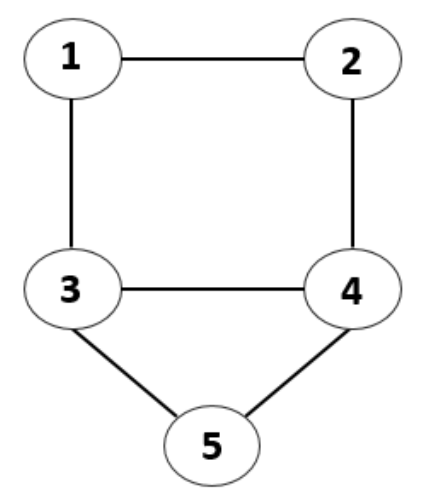

Formaremos la expresión QUBO $\min \sum_{(i,j) \in E} -x_i-x_j+2x_ix_j$ usando las aristas del grafo dado: 1-2, 1-3, 2-4, 3- 4, 3-5, 4-5.

$$\min~(-x_1-x_2+2x_1x_2)+(-x_1-x_3+2x_1x_3)+(-x_2-x_4+2x_2x_4)+(-x_3-x_4+2x_3x_4)+(-x_3-x_5+2x_3x_5)+(-x_4-x_5+2x_4x_5)$$

Después de simplificar, obtenemos la expresión:

$$\min~-2x_1-2x_2-3x_3-3x_4-2x_5+2x_1x_2+2x_1x_3+2x_2x_4+2x_3x_4+2x_3x_5+2x_4x_5$$

Reemplacemos las variables de la forma $x_i^2$ con $x_i$

$$\min~ -2x_1^2-2x_2^2-3x_3^2-3x_4^2-2x_5^2+2x_1x_2+2x_1x_3+2x_2x_4+2x_3x_4+2x_3x_5+2x_4x_5$$

para obtener la forma deseada

$$\min_{x \in \{0,1\}^5} x^T Q x$$

donde $x$ es:

$$x = \begin{pmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5
\end{pmatrix}$$

La matriz diagonal superior $Q$ está dada por

$$Q = \begin{pmatrix}
-2 & 2 & 2 & 0 & 0\\
0 & -2 & 0 & 2 & 0\\
0 & 0 & -3 & 2 & 2\\
0 & 0 & 0 & -3 & 2\\
0 & 0 & 0 & 0 & -2
\end{pmatrix}$$

Ahora, minimicemos nuestra función objetivo QUBO y encontremos el $x$ óptimo que dé como resultado una división de vértices con el mayor tamaño de corte de borde. El tamaño del corte de borde es una medida del número total de bordes atravesados por un corte.

Para nuestro grafo con 5 vértices, supongamos que tenemos el siguiente corte:

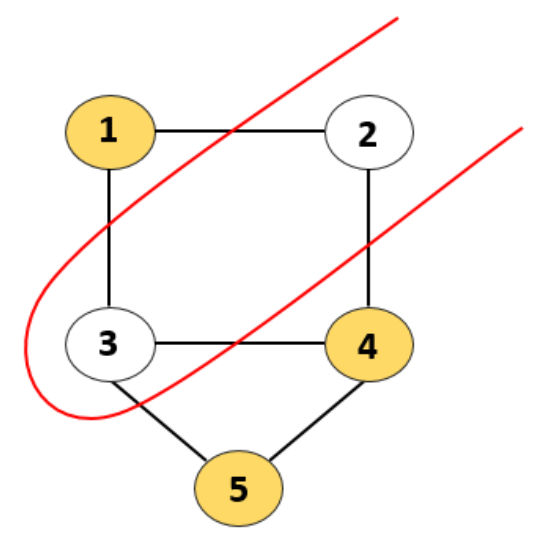

El corte divide los vértices 1, 4 y 5 en un grupo (supongamos que es el Grupo 1) y los vértices 2 y 3 en el otro grupo (Grupo 2). De nuestra definición de variable binaria $x_i$, $x_1 = x_4 = x_5 = 0$ y $x_2 = x_3 = 1$. Entonces, $x=(0,1,1,0,0)$.

<a id="5"></a>
# 5. El modelo Ising

Los electrones tienen una propiedad de la mecánica cuántica llamada <b> espín </b> que es el momento angular de la partícula. Cuando se mide, es $h/2$ (espín arriba) o $-h/2$ (espín abajo), donde $h$ es la constante de Planck.

El espín de un electrón está estrechamente relacionado con su momento magnético, de modo que un electrón se comporta como una pequeña barra magnética con un polo norte (N) y un polo sur (S). El <i>ferromagnetismo</i> surge cuando un conjunto de espines atómicos se alinean de manera que sus momentos magnéticos asociados apuntan todos en la misma dirección, y los espines se comportan como un gran imán con un momento magnético macroscópico neto.

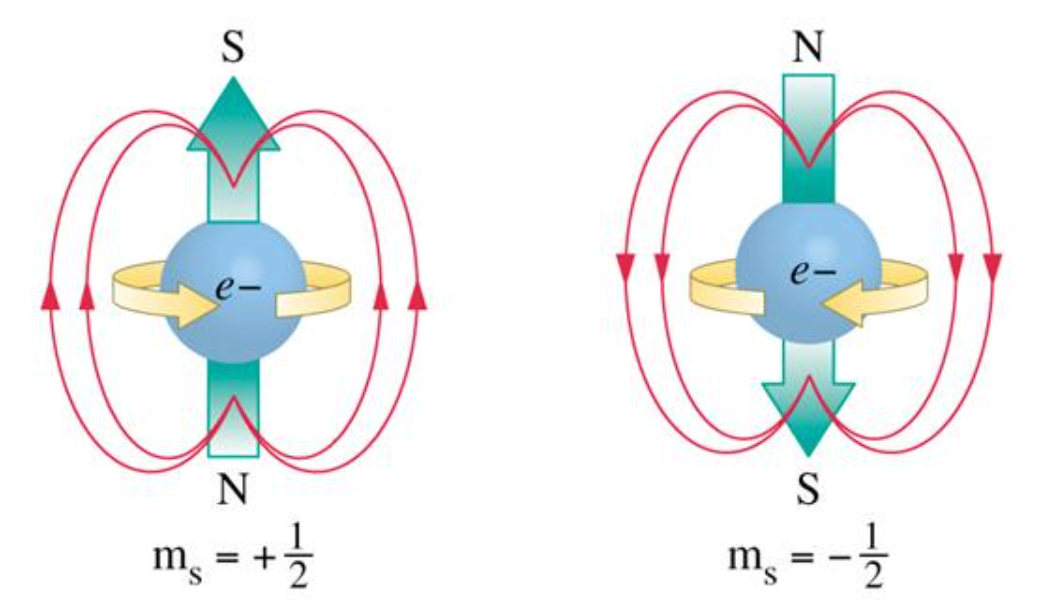

El <b>Modelo Ising</b> es un <i>modelo matemático</i> para estudiar el ferromagnetismo en física estadística. El modelo Ising fue propuesto por primera vez por Wilhelm Lenz, quien se lo planteó como problema a su estudiante de posgrado Ernst Ising, de quien toma su nombre. 

Para simplificar, diremos que cada espín toma el valor $s=1$ (arriba) o $s=-1$ (abajo).

Cuando los espínes se organizan en una línea unidimensional, de modo que cada uno interactúa solo con sus vecinos derecho e izquierdo, el modelo se denomina **Modelo Ising unidimensional**.

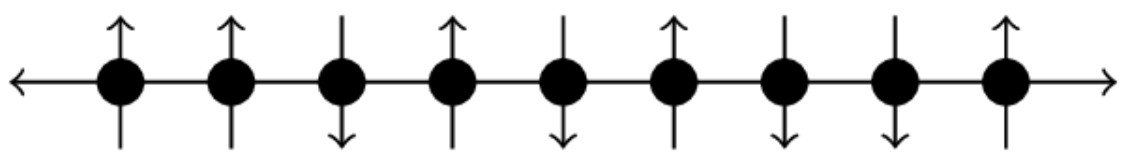

Cuando los espines se organizan en una red bidimensional, de modo que cada uno interactúa con sus vecinos derecho, izquierdo, arriba y abajo, el modelo  se conoce como **modelo Ising bidimensional**.

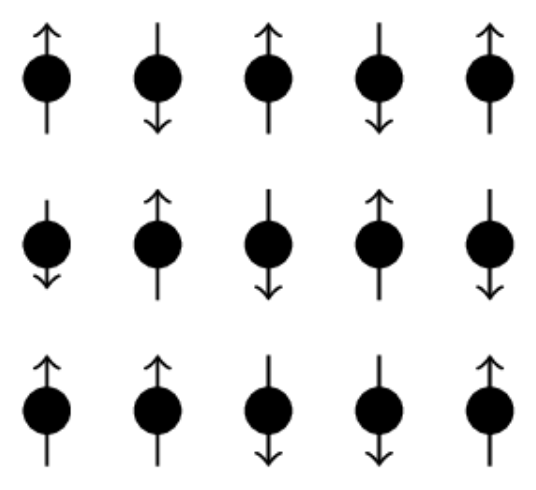

La configuración de espines que produce la menor energía se conoce como <b>estado fundamental</b>. Es NP-Hard encontrar el estado fundamental de un modelo Ising 2D. Por lo tanto, encontrar el estado fundamental es tan difícil como problemas como el de Max-Cut y el problema de TSP.

Ten en cuenta que los espines se pueden organizar en cualquier otra configuración.

<a id="5.1"></a>
## 5.A Energía del sistema

Nos gustaría expresar la energía de cada configuración posible de los espines del sistema. Supondremos que todos los acoplamientos posibles son posibles entre dos espines cualesquiera.

- Los espines interactúan con el campo magnético externo $h$, si está presente. 
- Cada estado de giro (variable) interactúa con sus vecinos. La <i>fuerza de acoplamiento</i>, de esta interacción espín-espín, se caracteriza por la constante $J$.
- Cada variable de giro $s_i$ toma los valores $\{-1,1\}$.

Con base en esos supuestos, la energía del modelo Ising se da como 

$$ E_{ising}(\mathbf{s}) = \sum_{i<j} J_{i,j} s_i s_j + \sum_i h_{i} s_i$$

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>:

Dado el modelo de Ising con las siguientes propiedades, escribir una función para calcular la energía para diferentes asignaciones de espín y usar esa función para encontrar el estado de energía más bajo.

- Hay 3 espines $s_0, s_1, s_2$.
- $h_0=4, h_1=2, h_2=-6$.
- $J_{0,1}=3, J_{0,2}=-1.3, J_{1,2}=2$

La función debe tomar como entrada los valores de $s_0,s_1,s_2$ y devolver la energía.

In [14]:
def calc_energy(s_0,s_1,s_2):
    return 3*s_0*s_1 + -1.3*s_0*s_2 + 2*s_1*s_2 + 4*s_0 + 2*s_1 + -6*s_2 

In [15]:
configurations = [[-1,-1,-1], [-1,-1,1],[-1,1,-1], [-1,1,1],[1,-1,-1], [1,-1,1],[1,1,-1], [1,1,1]]

conf_dict = {}
lowest_e = 1000
ground_state = []
for c in configurations:
    e = calc_energy(c[0],c[1],c[2])
    print("La energía para la configuración", c, ": ", e)
    if e < lowest_e:
        lowest_e = e
        ground_state = c
print("Estado fundamental: ", ground_state)
print("Energía más baja:   ", lowest_e)

La energía para la configuración [-1, -1, -1] :  3.7
La energía para la configuración [-1, -1, 1] :  -9.7
La energía para la configuración [-1, 1, -1] :  -2.3000000000000007
La energía para la configuración [-1, 1, 1] :  -7.7
La energía para la configuración [1, -1, -1] :  8.3
La energía para la configuración [1, -1, 1] :  -10.3
La energía para la configuración [1, 1, -1] :  14.3
La energía para la configuración [1, 1, 1] :  3.6999999999999993
Estado fundamental:  [1, -1, 1]
Energía más baja:    -10.3


### Formulaciones de Ising para problemas de optimización combinatoria

Notemos que el modelo Ising, donde tenemos variables de espín en lugar de variables binarias, nos brinda otra herramienta para expresar problemas de optimización combinatoria, de modo que minimizar la energía del modelo Ising nos da la solución óptima.

<a id="5.2"></a>
## 5.B Formulación del modelo Ising para Max-Cut

El problema Max-Cut resulta una formulación natural del modelo Ising. Recordemos la definición.

Dado un grafo, el problema requiere dividir los vértices/nodos en dos grupos disjuntos para que haya tantas aristas como sea posible entre los grupos. La partición de dos vértices adyacentes en conjuntos disjuntos se denomina corte. El objetivo de este problema es encontrar un corte de tal manera que cubra el máximo número de aristas.

Como en la formulación QUBO, primero decidiremos qué representan nuestras variables de espín. Para cada vértice $i$, usaremos una variable de espín $s_i$ para decidir a qué grupo debe pertenecer:

$$s_{i}=
\left\{
\begin{array}{ll} 
      1, & \text{si el vértice $i$ está en el Grupo 1} \\
      -1, & \text{si el vértice $i$ está en el Grupo 2} \\
\end{array}
\right.$$

**Nuestro objetivo es maximizar el número de aristas en el corte.**

Notemos que para una arista $(i,j)$, $s_is_j=1$ si los vértices están en el mismo grupo y $s_is_j=-1$ en caso contrario. 

Por lo tanto, podemos expresar el número exacto de aristas en el corte como $ \frac{1}{2} \sum_{(i, j) \in E} (1 - s_is_j)$, que es un problema de maximización. El problema de minimización equivalente viene dado por 

$$\min~\frac{1}{2} \sum_{(i, j) \in E} (s_is_j-1)$$

Ten en cuenta que en la práctica sería suficiente minimizar 

$$\min~\sum_{(i,j) \in E} s_is_j$$

Entonces, la configuración de espines que minimiza la energía del problema anterior produce la solución óptima al problema de corte máximo.

<a id="5.3"></a>
## 5.C Conversión de Ising a QUBO

Los problemas de Ising se expresan mediante variables de espín $\{-1, 1\}$, mientras que las formulaciones de QUBO se expresan mediante variables binarias $\{0, 1\}$. 

Las dos formulaciones se pueden convertir entre sí mediante la siguiente transformación:

$$ x_j \mapsto \frac{1 + s_j }{2} $$

donde $x_j$ es la variable QUBO y $s_j$ es la variable Ising. 

Sustituir el valor de la variable dará como resultado la conversión de un modelo a otro.

<a id="6"></a>
# 6. Binary Quadratic Model

Hasta ahora, hemos aprendido a formular problemas de optimización combinatoria como problemas QUBO o con el modelo Ising. También hemos aprendido cómo realizar conversiones entre estas dos formulaciones. 

Nuestro objetivo final es aprovechar el quantum annealing para resolver estos problemas. Para hacerlo, tenemos que formular nuestros problemas QUBO o modelo Ising de manera que puedan ejecutarse en dispositivos de temple cuántico, actualmente proporcionados por D-Wave.

El [Ocean SDK](https://github.com/dwavesystems/dwave-ocean-sdk) nos proporciona muchas herramientas de código abierto para ayudarnos en el proceso de resolución de problemas. Ahora echemos un vistazo a la clase `BinaryQuadraticModel` disponible en el paquete `dimod` de este paquete.

<a id="6.1"></a>
## 6.A Clase `BinaryQuadraticModel` (BQM) de Ocean SDK

La clase `BinaryQuadraticModel` nos ayuda a formular nuestros problemas QUBO o de model Ising en una forma adecuada para ejecutarse en D-Wave. Recordemos las funciones objetivas de QUBO y el modelo Ising.

La función objetivo de un QUBO viene dada por,

$$\sum\limits_{i} {Q_{i, i} x_i} + \sum\limits_{i < j} {Q_{i, j} x_i x_j} \qquad\qquad x_i\in \{0,1 \}$$

donde las variables pueden tomar los valores $0$ y $1$.

La función objetivo de un modelo Ising viene dada por,

$$\sum\limits_{i} h_i s_i + \sum\limits_{i<j} J_{i,j} s_i s_j \qquad\qquad s_i \in\{-1,+1\}$$

donde las variables pueden tomar los valores $-1$ y $+1$ correspondientes a los espínes físicos de Ising.

La función objetivo de un modelo cuadrático binario (Binary Quadratic Model) viene dada por,

$$\sum\limits_{i=1} a_i v_i + \sum\limits_{i<j} b_{i,j} v_i v_j + c \qquad\qquad v_i \in \{0,1\} \text{  or } \{-1,+1\}$$

Tengamos en cuenta que la variable $v_i$ puede corresponder a $\{0, 1\}$ o a los espines físicos de Ising $\{-1, +1\}$. De esta manera, un BQM puede representar convenientemente tanto un QUBO como un modelo Ising.

### Creando una instancia de BQM

Primero echemos un vistazo a algunos de los parámetros esenciales necesarios para crear una instancia de la clase `BinaryQuadraticModel`.

### Parámetros

- `lineal` 
    - Los términos lineales de la función objetivo deben definirse como un diccionario.
    - Las claves del diccionario deben ser las variables y sus respectivos valores deben ser los coeficientes asociados a dichas variables. Por ejemplo,

     ```python
     {'x1': 3, 'x2': 5, 'x3': 4, 'x4': 7}
     ```
    
- `quadratic`
    - Los términos cuadráticos de la función objetivo deben definirse como un diccionario.
    - Las claves del diccionario deben ser los pares de variables definidas como tuplas y sus respectivos valores deben ser los coeficientes asociados a esos pares de variables. Por ejemplo,

     ```python
     {('x1', 'x2'): 2, ('x2', 'x3'): 5}
     ```
       
- `offset`
     - El valor de compensación de energía constante asociado con el BQM se puede configurar mediante este parámetro. 
     - Si no hay compensación, no es necesario especificarla.
    
    
- `Vartype`
     - Este parámetro establece el tipo de variable del BQM. Para crear una instancia de QUBO, se establece este parámetro en `'BINARY'`.
     - Para crear una instancia del modelo Ising, se establece este parámetro en `'SPIN'`.

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>:

Intentemos ahora crear una instancia BQM para la siguiente formulación QUBO:

$$- 5x_1 - 3x_2 - 8x_3 - 6x_4 + 4x_1 x_2 + 8x_1 x_3 + 2x_2 x_3 + 10x_3 x_4$$

$$ $$

Deberíamos definir las partes lineal y cuadrática de la función objetivo como diccionarios y pasarlas en los argumentos `linear` y `quadratic`. En la función objetivo,

- La parte lineal es $- 5x_1 - 3x_2 - 8x_3 - 6x_4$. El diccionario correspondiente se puede definir como 

```python
{'x1': -5, 'x2': -3, 'x3': -8, 'x4': -6}
```
                       
- La parte cuadrática es $4x_1 x_2 + 8x_1 x_3 + 2x_2 x_3 + 10x_3 x_4$. El diccionario correspondiente se puede definir como

```python
{('x1', 'x2'): 4, ('x1', 'x3'): 8, ('x2', 'x3'): 2, ('x3', 'x4'): 10}
```  

- No hay compensación, por lo que no es necesario especificarla.

Podemos crear una instancia QUBO de BQM configurando el parámetro `Vartype` en `'BINARY'`.

In [16]:
from dimod import BQM

linear = {"x1": -5, "x2": -3, "x3": -8, "x4": -6}
quadratic = {("x1", "x2"): 4, ("x1", "x3"): 8, ("x2", "x3"): 2, ("x3", "x4"): 10}
vartype = "BINARY"

bqm_qubo = BQM(linear, quadratic, vartype)

Imprimamos y veamos el bqm que hemos creado:

In [17]:
bqm_qubo

BinaryQuadraticModel({'x1': -5.0, 'x2': -3.0, 'x3': -8.0, 'x4': -6.0}, {('x2', 'x1'): 4.0, ('x3', 'x1'): 8.0, ('x3', 'x2'): 2.0, ('x4', 'x3'): 10.0}, 0.0, 'BINARY')

$$ $$
De manera similar, podemos crear una instancia Ising de BQM configurando el parámetro `Vartype` en `'SPIN'`.

$$ $$
Notemos que el parámetro `Vartype` simplemente establece el tipo de variable para el BQM y no convierte automáticamente entre un QUBO y el modelo Ising. Recordemos que para convertir un QUBO a un modelo Ising, se debe utilizar la siguiente transformación.

$$ x_j \mapsto \frac{1-s_j}{2} $$
    
Aunque si existen métodos en Ocean SDK para realizar conversiones entre formulaciones.

<a id="6.2"></a>
## 6.B Encontrar la energía más baja usando un muestreador clásico

Ocean SDK proporciona muestreadores clásicos, cuánticos e híbridos para ayudarnos a encontrar soluciones óptimas a nuestros problemas. Un muestreador intenta muestrear estados de baja energía para un BQM determinado y devuelve un iterable de muestras en orden ascendente de los valores de energía.

Usaremos `ExactSolver()` para muestrear nuestros problemas de manera clásica. Funciona encontrando los valores de energía de todas las muestras posibles para un BQM determinado. Como puedes adivinar, este no es un proceso eficiente pero es lo suficientemente bueno para problemas pequeños. El límite general es de 18 variables más allá del cual el proceso se vuelve muy lento. `ExactSolver()` puede ser útil para probar nuestro código durante el desarrollo.

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>:

Intentemos crear una instancia QUBO de BQM y encontrar los valores de energía para la siguiente función objetivo

$$f(x_1, x_2, x_3, x_4) = 3x_1 - 7x_2 + 11x_3 - x_4 + 9x_1 x_2 + x_1 x_3 + 2x_2 x_3 + 8x_3 x_4$$

En la función objetivo,

- La parte lineal es $3x_1 - 7x_2 + 11x_3 - x_4$
- La parte cuadrática es $9x_1 x_2 + x_1 x_3 + 2x_2 x_3 + 8x_3 x_4$

In [18]:
from dimod import BQM
from dimod.reference.samplers import ExactSolver

linear = {'x1': 3, 'x2': -7, 'x3': 11, 'x4': -1}
quadratic = {('x1', 'x2'): 9, ('x1', 'x3'): 1, ('x2', 'x3'): 2, ('x3', 'x4'): 8}
vartype = 'BINARY'

bqm_qubo = BQM(linear, quadratic, vartype)

Ahora que hemos creado una instancia de QUBO, podemos asignar `ExactSolver()` a una variable. Luego deberíamos pasar la instancia `bqm_qubo` como argumento al método `sample()` de `ExactSolver()` y asignarlo a otra variable. Esta variable contendría entonces todas las muestras posibles en orden ascendente de sus valores de energía.

In [19]:
sampler = ExactSolver()
sampleset = sampler.sample(bqm_qubo)

print(sampleset)

   x1 x2 x3 x4 energy num_oc.
12  0  1  0  1   -8.0       1
3   0  1  0  0   -7.0       1
15  0  0  0  1   -1.0       1
0   0  0  0  0    0.0       1
14  1  0  0  1    2.0       1
1   1  0  0  0    3.0       1
13  1  1  0  1    4.0       1
2   1  1  0  0    5.0       1
4   0  1  1  0    6.0       1
7   0  0  1  0   11.0       1
11  0  1  1  1   13.0       1
6   1  0  1  0   15.0       1
8   0  0  1  1   18.0       1
5   1  1  1  0   19.0       1
9   1  0  1  1   22.0       1
10  1  1  1  1   26.0       1
['BINARY', 16 rows, 16 samples, 4 variables]


En el resultado anterior,

- La primera columna representa el número de serie.
- Las siguientes cuatro columnas representan los diferentes valores de las cuatro variables presentes en la función objetivo.
- La columna `energy` se refiere al valor de la función objetivo para cada muestra.
- `num_oc .` se refiere al número de apariciones de cada muestra. Dado que el muestreador clásico determina exactamente el valor de energía para todas y cada una de las muestras, el número de ocurrencias para cada muestra es solo 1.

Podemos observar en el resultado que la primera muestra `(0, 1, 0, 1)` minimiza la función objetivo a un valor de `-8.0`. ¡Esa es la solución óptima que estamos buscando! Los valores de energía de las muestras posteriores son `-7.0`, `-1.0`, etc.

Se puede acceder a la solución óptima que produce el valor de nergía más bajo utilizando el atributo `first`.

In [20]:
print(sampleset.first)

Sample(sample={'x1': 0, 'x2': 1, 'x3': 0, 'x4': 1}, energy=-8.0, num_occurrences=1)


<a id="6.3"></a>
## 6.C Annealing simulado

El recocido simulado es un algoritmo estocástico de optimización de búsqueda global.

El algoritmo está inspirado en el recocido en metalurgia, donde el metal se calienta rápidamente a una temperatura alta y luego se enfría lentamente. 

El proceso de recocido físico funciona excitando primero los átomos del material a una temperatura alta, lo que permite que los átomos se muevan mucho, y luego disminuye su excitación lentamente, lo que permite que los átomos caigan en una configuración nueva y más estable. 

El <b>recocido simulado</b> (Simulated Annealing, SA) imita el proceso de recocido físico. (Hay que notar que no es un proceso físico sino una analogía). 

Puede considerarse como una versión modificada de la escalada estocástica. La escalada estocástica mantiene una solución candidata única y toma pasos de un tamaño aleatorio pero restringido desde el candidato en el espacio de búsqueda. Si el nuevo punto es mejor que el punto actual, entonces el punto actual se reemplaza por el nuevo punto. Este proceso continúa durante un número fijo de iteraciones.

### Algoritmo

<B> Paso 1: </B> Comenzar con una solución factible inicial $s=s_0$ y una temperatura $t=t_0$.

<B> Paso 2: </B> Hasta que se alcancen las condiciones de terminación, repetir lo siguiente: 
   
* Elejir una solución $s'$ de la vecindad de soluciones $N(s)$. 
* Sea $\bigtriangleup$ la diferencia entre el costo de $s'$ y $s$.
* Si $\bigtriangleup<0$, aceptar la nueva solución, es decir, $s=s'$. De lo contrario, elija un número aleatorio $p$ entre 0 y 1. Aceptar $s'$ si $e^{-\bigtriangleup c/t } >p$.
* Calcular la nueva temperatura $t$ según el <i>programa de recocido</i>.

### D-Wave Simulated Annealer

Ahora investigaremos cómo podemos ejecutar un algoritmo de recocido simulado desde el paquete de D-Wave.

In [21]:
from dimod import BQM

from neal import SimulatedAnnealingSampler 
sampler = SimulatedAnnealingSampler()

linear = {'x1': -5, 'x2': -3, 'x3': -8, 'x4': -6}
quadratic = {('x1', 'x2'): 4, ('x1', 'x3'): 8, ('x2', 'x3'): 2, ('x3', 'x4'): 10}
vartype = 'BINARY'

bqm = BQM(linear, quadratic, vartype)

sampleset = sampler.sample(bqm, num_reads=10)
print(sampleset)

  x1 x2 x3 x4 energy num_oc.
0  1  0  0  1  -11.0       1
1  1  0  0  1  -11.0       1
2  1  0  0  1  -11.0       1
3  1  0  0  1  -11.0       1
4  1  0  0  1  -11.0       1
5  1  0  0  1  -11.0       1
6  1  0  0  1  -11.0       1
7  1  0  0  1  -11.0       1
8  1  0  0  1  -11.0       1
9  1  0  0  1  -11.0       1
['BINARY', 10 rows, 10 samples, 4 variables]


<a id="6.4"></a>
## 6.D Quantum Annealing en D-Wave

In [22]:
from dimod import BQM
from dwave.system import DWaveSampler, EmbeddingComposite
import numpy as np
import networkx as nx
from bqm_utils import graph_viz

Podemos observar que en lugar de `SimulatedAnnealingSampler`, importamos `DWaveSampler`. Las funciones para obtener la muestra, es decir, `sample`, `sample_qubo`, `sample_ising` son las mismas para ambos muestreadores.

Cuando se us la clase `DWaveSampler`, se devuelve la QPU denominada D-Wave Advantage 4.1. Advantage QPU tiene 5640 qubits con topología Pegasus y 4.1 es la versión con actualización de rendimiento. La QPU anterior se llamaba D-Wave 2000 y actualmente D-Wave está trabajando en D-Wave Advantage 2. Puedes leer más sobre las QPU de D-Wave [aquí](https://docs.dwavesys.com/docs/latest/c_gs_4.html).

<div class="alert alert-block alert-warning">
Ten en cuenta que cuando se ejecuta un problema en D-Wave, tus créditos se reducen.
</div>

```python
sampler = DWaveSampler()

quadratic = {('s_1', 's_2'): 4}
vartype = 'SPIN'

bqm = BQM(quadratic, vartype)

sampleset = sampler.sample(bqm, num_reads=10)
print(sampleset)
```

Sin embargo, cuando ejecutes el código anterior encontrarás un error:

> BinaryQuadraticModelStructureError: Problem graph incompatible with solver. Please use 'EmbeddingComposite' to map the problem graph to the solver.

El problema es que no hay qubits llamados `s_1` y `s_2` en el dispositivo real. 

Obtengamos la lista de nodos del dispositivo real:

```python
sampler.nodelist
```

Esta vez ingresamos 30 y 31 como nombres de nuestros qubits:

```python
from dimod import BQM

from dwave.system import DWaveSampler
sampler = DWaveSampler()

quadratic = {(30, 31): 4}
vartype = 'SPIN'

bqm = BQM(quadratic, vartype)

sampleset = sampler.sample(bqm, num_reads=10)
print(sampleset)
```

El código anterior ya funcionará coom es esperado y se obtendrá el resultado desde un dispositivo real en la nube provisto por D-Wave.